# Using a CNN for music recognition

## Importing libraries

In [ ]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
from keras.utils import np_utils 

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from matplotlib import cm

import itertools

## Importing data

In [ ]:
import librosa
import librosa.display
import pandas as pd
import os
import statsmodels.api
from  sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


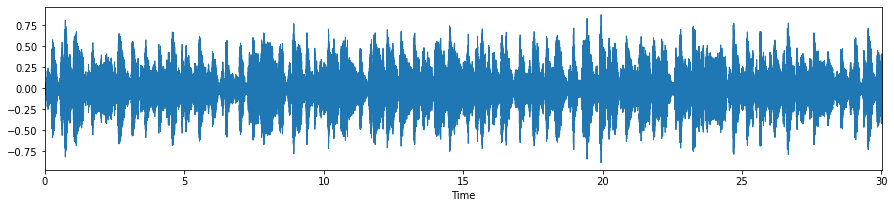

In [ ]:
file = '/content/gdrive/My Drive/projet_musique/musics/genres/blues/blues.00000.wav'
wav, sr = librosa.load(file)

plt.figure(figsize=(15,3))
librosa.display.waveplot(wav,sr=sr);


In [ ]:
filepath = "/content/gdrive/My Drive/projet_musique/musics/genres/"

list_genres = [f for f in os.listdir(path=filepath) if os.path.isdir(filepath+f)]

target = []
sample_points = 66000
raw_music_df = pd.DataFrame()

for j,genre in enumerate(list_genres):
    print(genre)
    list_songs_per_genre = [filepath+genre+'/'+f for f in os.listdir(path=(filepath+genre+'/'))]
    for i,file in enumerate(list_songs_per_genre):  
        target.append(genre)
        wav, sr = librosa.load(file)
        wav_reshaped = wav[:sample_points].reshape(1,sample_points)
        wav_df = pd.DataFrame(wav_reshaped)
        raw_music_df = raw_music_df.append(wav_df,ignore_index=True)
                
print('Done')

country
blues
classical
disco
reggae
metal
hiphop
pop
jazz
rock
Done


In [ ]:
raw_music_df.shape

(1000, 66000)

In [ ]:
target = pd.DataFrame(target, columns=['label'])

In [ ]:
target.shape

(1000, 1)

## Aim of the classification procedure

The goal here is to build a machine learning model that will predict the music genre of a music track given its features. Therefore, we'll divide the dataset between a target value which contains the labels, and the rest will be used as the learning set, called data.

In [ ]:
target = target.label
data = raw_music_df

In [ ]:
target.value_counts()

rock         100
metal        100
hiphop       100
classical    100
blues        100
jazz         100
disco        100
country      100
reggae       100
pop          100
Name: label, dtype: int64

## Preparing the target column

In [ ]:
# Encode the label classes using LabelEncoder
encoder = preprocessing.LabelEncoder()
target = encoder.fit_transform(target)

## Division between train and test sets

In [ ]:
# Split for the train and test datasets
X_train, X_test, y_train, y_test = train_test_split (data, target,
                                                    test_size = 0.2 ,
                                                    random_state = 42 ,
                                                    stratify = target)

In [ ]:
# Split for the train and test datasets
"""X_test, X_val, y_test, y_val = train_test_split (X_test, y_test,
                                                    test_size = 0.5 ,
                                                    random_state = 42 ,
                                                    stratify = y_test)"""

'X_test, X_val, y_test, y_val = train_test_split (X_test, y_test,\n                                                    test_size = 0.5 ,\n                                                    random_state = 42 ,\n                                                    stratify = y_test)'

In [ ]:
# One-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#y_val = np_utils.to_categorical(y_val)

In [ ]:
X_train = X_train.to_numpy().reshape((-1,sample_points,1))
X_test = X_test.to_numpy().reshape((-1,sample_points,1))
#X_val = X_val.to_numpy().reshape((-1,sample_points,1))

In [ ]:
X_val.shape

NameError: ignored

In [ ]:
y_train.shape

(800, 10)

## Building the architecture of the CNN

In [ ]:
model = Sequential()

first_layer = Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sample_points,1))
second_layer = MaxPooling1D(pool_size=2)
third_layer = Conv1D(filters=8, kernel_size=20, activation='relu')
fourth_layer = MaxPooling1D(pool_size=2)
conv_layer = Conv1D(filters=16, kernel_size=3, activation='relu')
pool_layer = MaxPooling1D(pool_size=2)
sixth_layer = Flatten()
seventh_layer = Dense(units=64,activation='relu')
output_layer = Dense(units=10,activation = 'softmax')

model.add(first_layer)
model.add(second_layer)
model.add(Dropout(rate=0.8))
model.add(third_layer)
model.add(fourth_layer)
model.add(Dropout(rate=0.8))
model.add(conv_layer)
model.add(pool_layer)
model.add(Dropout(rate=0.6))
model.add(sixth_layer)
model.add(seventh_layer)
model.add(output_layer)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 65998, 32)         128       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 32999, 32)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32999, 32)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 32980, 8)          5128      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 16490, 8)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16490, 8)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 16488, 16)        

## Training the model 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

training_history = model.fit(X_train,y_train,
                             validation_split=0.2,
                             epochs = 10,
                             batch_size = 50)

Epoch 1/10
13/13 [==============================] - 110s 8s/step - loss: 4.5016 - accuracy: 0.0931 - val_loss: 2.3018 - val_accuracy: 0.1312
Epoch 2/10
13/13 [==============================] - 110s 9s/step - loss: 2.3095 - accuracy: 0.2097 - val_loss: 2.3013 - val_accuracy: 0.1312
Epoch 3/10
13/13 [==============================] - 109s 8s/step - loss: 2.2683 - accuracy: 0.1926 - val_loss: 2.3006 - val_accuracy: 0.1312
Epoch 4/10
13/13 [==============================] - 109s 8s/step - loss: 2.2594 - accuracy: 0.1761 - val_loss: 2.2998 - val_accuracy: 0.1312
Epoch 5/10
13/13 [==============================] - 108s 8s/step - loss: 2.2474 - accuracy: 0.1892 - val_loss: 2.2988 - val_accuracy: 0.1312
Epoch 6/10
 6/13 [============>.................] - ETA: 57s - loss: 2.1997 - accuracy: 0.2499 

## Result of the training

In [ ]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

In [ ]:
test_pred = model.predict(X_test)

test_pred_class = np.argmax(test_pred,axis=1)
y_test_class = np.argmax(y_test,axis=1)

print(metrics.classification_report(y_test_class,test_pred_class))

              precision    recall  f1-score   support

           0       0.05      0.05      0.05        20
           1       0.70      0.80      0.74        20
           2       0.22      0.10      0.14        20
           3       0.06      0.05      0.05        20
           4       0.14      0.20      0.17        20
           5       0.20      0.10      0.13        20
           6       0.15      0.30      0.20        20
           7       0.11      0.20      0.14        20
           8       0.27      0.15      0.19        20
           9       0.17      0.05      0.08        20

    accuracy                           0.20       200
   macro avg       0.21      0.20      0.19       200
weighted avg       0.21      0.20      0.19       200



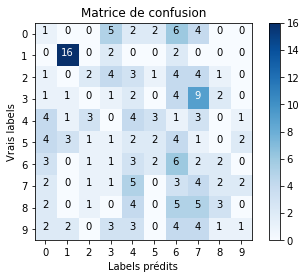

In [ ]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)

classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

ValueError: ignored

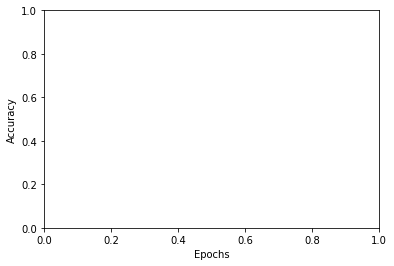

In [ ]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 101, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , 101, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()